# CODE

## Ashok R 
## Roll No:11

In [46]:
#Declare all the libaries

import imageio.v2
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc


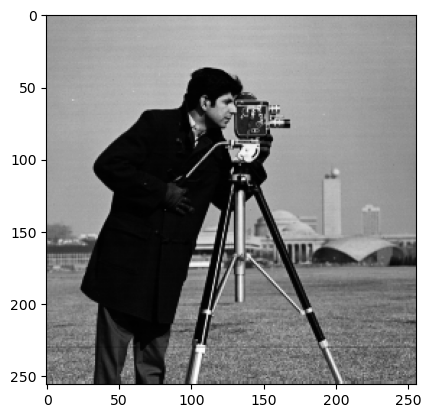

In [47]:
#Read an image and converts into an 2D array of 256*256 with value ranging from grayscale(0-255)

img = imageio.v2.imread("cameraman.png")
plt.imshow(img,cmap='gray')
plt.show()

Text(0.5, 1.0, 'Transmitted Signal Constellation Diagram')

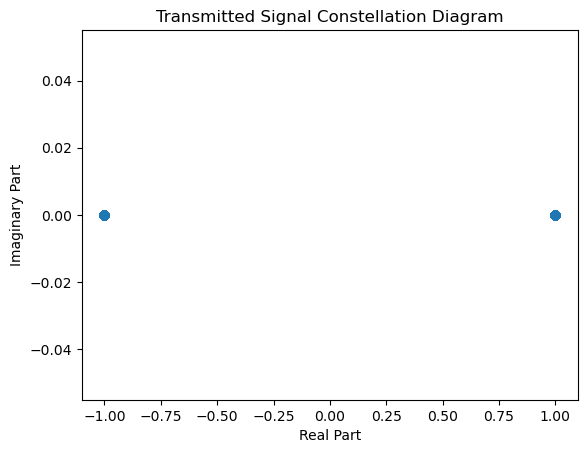

In [48]:
#plot the constellation 

plt.scatter(transmitted_signal.real, transmitted_signal.imag)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Transmitted Signal Constellation Diagram')


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


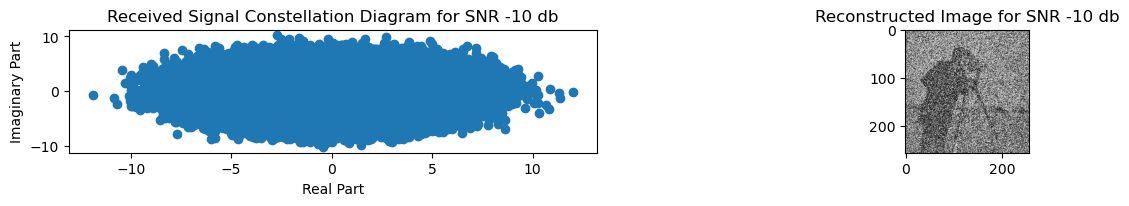

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


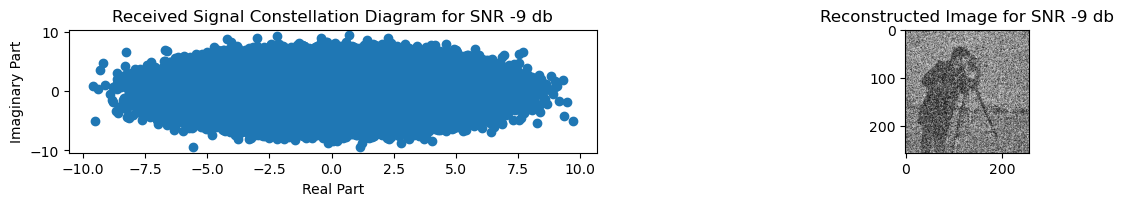

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


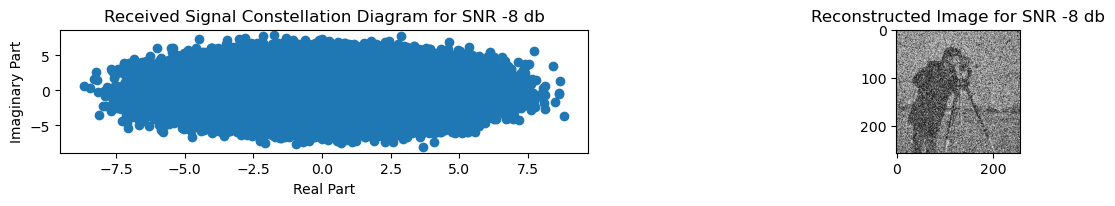

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


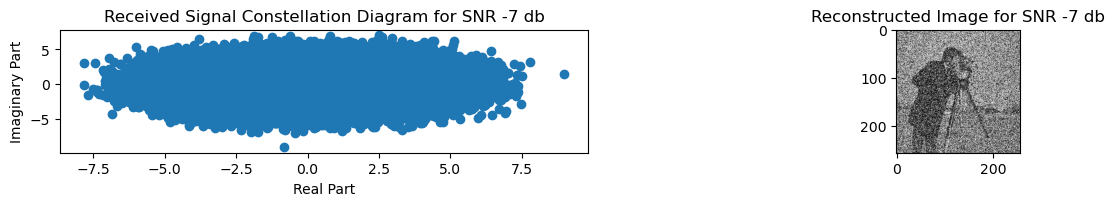

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


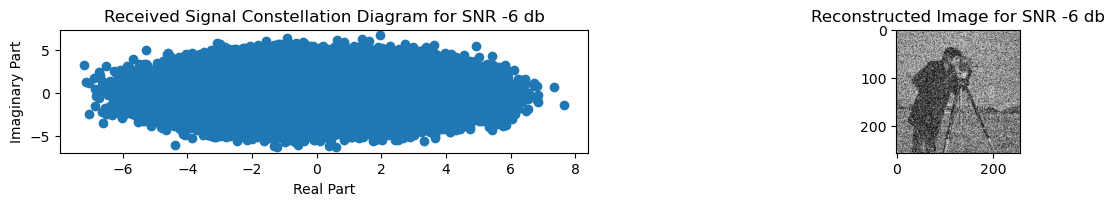

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


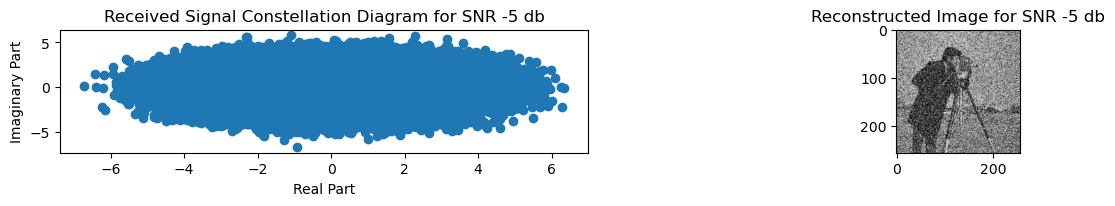

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


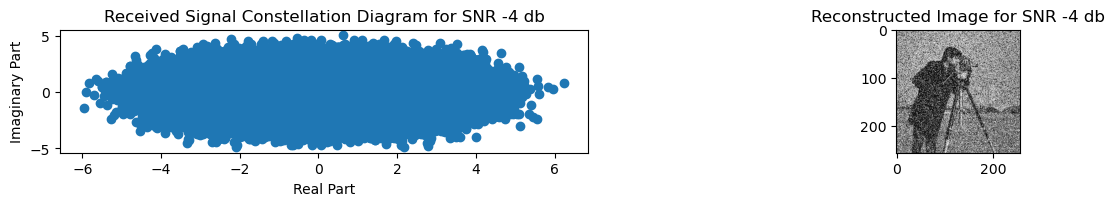

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


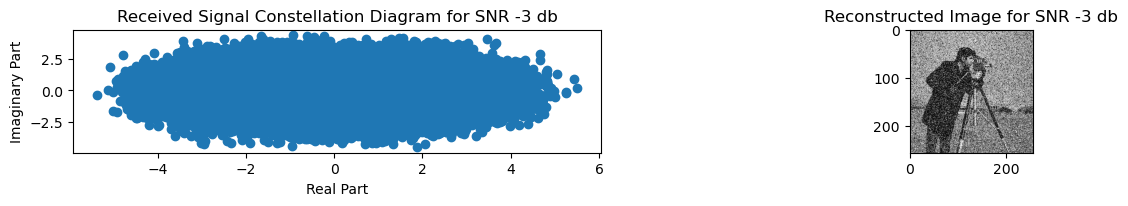

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


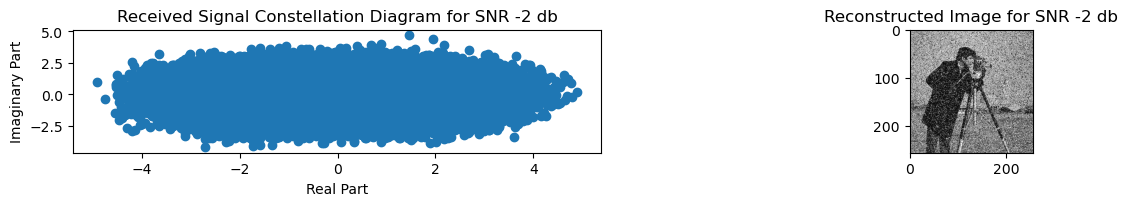

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


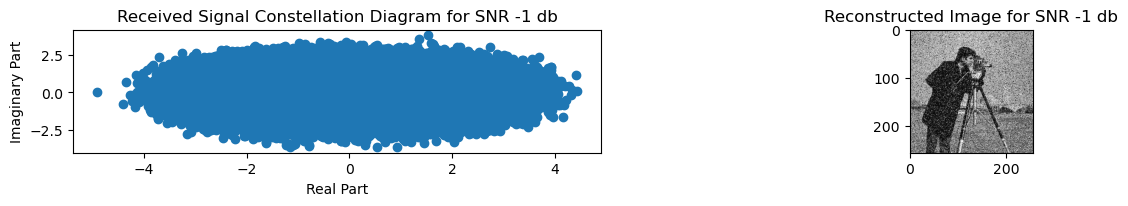

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


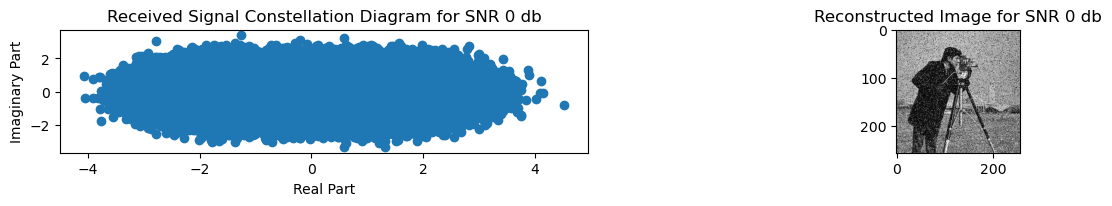

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


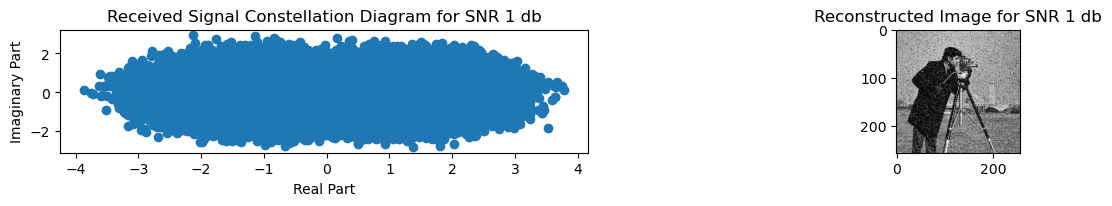

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


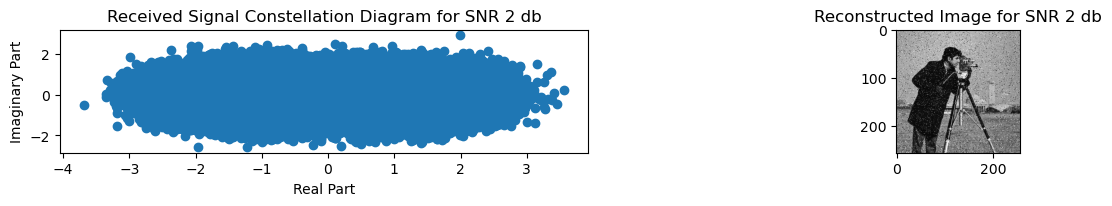

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


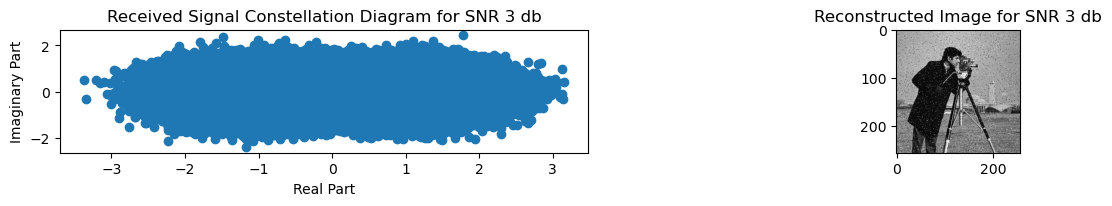

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


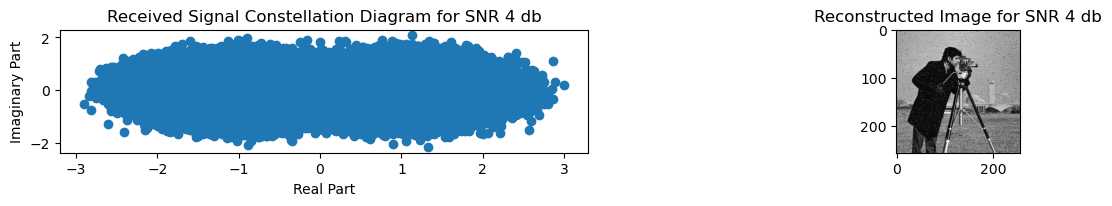

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


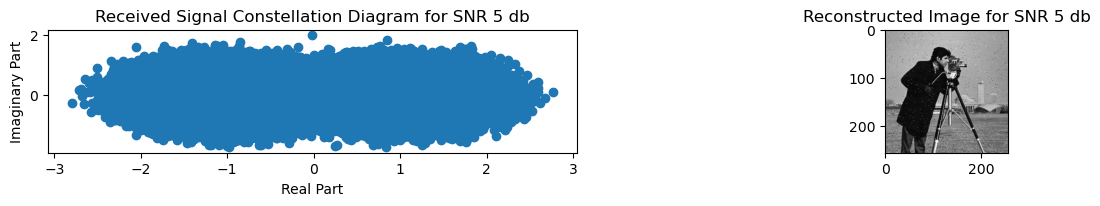

Lossy conversion from int32 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.


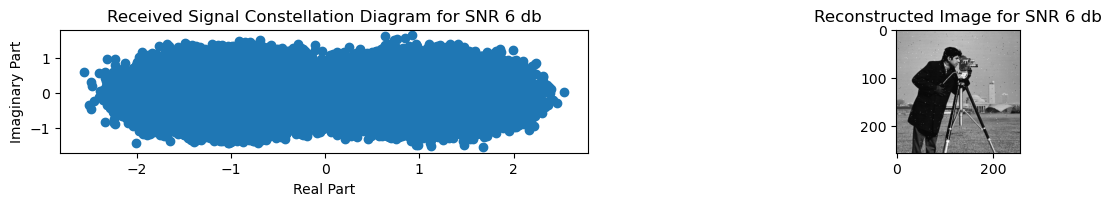

Lossy conversion from int32 to uint8. Range [1, 255]. Convert image to uint8 prior to saving to suppress this warning.


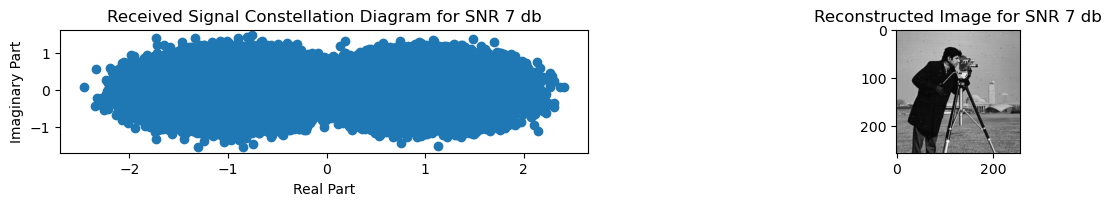

Lossy conversion from int32 to uint8. Range [3, 253]. Convert image to uint8 prior to saving to suppress this warning.


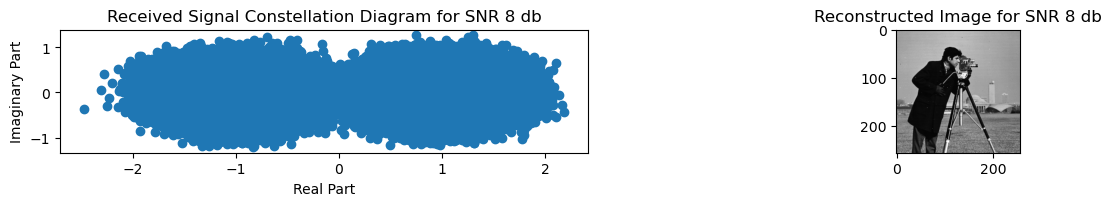

Lossy conversion from int32 to uint8. Range [5, 255]. Convert image to uint8 prior to saving to suppress this warning.


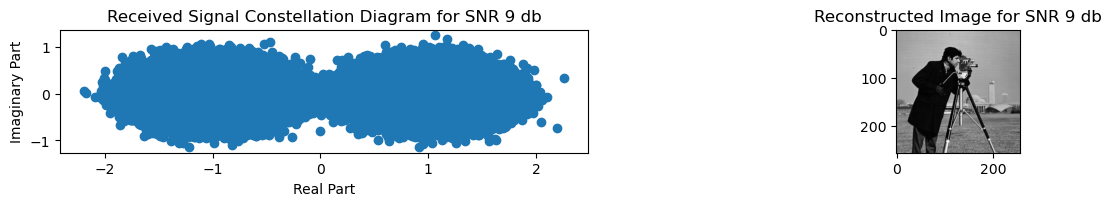

Lossy conversion from int32 to uint8. Range [6, 253]. Convert image to uint8 prior to saving to suppress this warning.


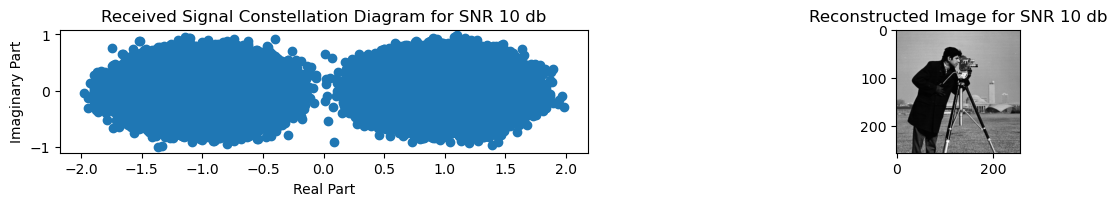

In [49]:
#reshape the array 2D to 1D, now size is 256*256=65536 
img =img.reshape(-1)

#convert the array numbers(0-255) into 8 bits, Total array size=65884*8=524288
binary_image=[list(np.binary_repr(i,width=8)) for i in img]
binary_image=np.array(binary_image).reshape(-1)
l=2


#convert the 1D array value 0 to -1 and 1 to 1
transmitted_signal=np.array([1 if i=='1' else -1 for i in binary_image])

BER_sim=list()
for s in range(-10,11,1):
    fig, ax = plt.subplots(1, 2, figsize=(15,40))
    snr_db = s #s

    # Calculate the SNR in linear scale
    snr = 10 ** (snr_db / 10)

    # Generate complex Gaussian noise with zero mean and unit variance
    noise = np.random.normal(loc=0, scale=np.sqrt(snr/2), size=(524288)) + 1j * np.random.normal(loc=0, \
                                                                                         scale=np.sqrt(snr/2), size=(524288))

    # Scale the noise to match the required SNR
    noise_power = np.var(noise)

    signal_power = 1
    scale_factor = np.sqrt(signal_power / (snr * noise_power))
    noise = noise * scale_factor

    # Add the noise to the symbols to create the received signal
    received_signal = transmitted_signal + noise
    plt.subplot(21,2,2*(s+10)+1)
    plt.scatter(received_signal.real, received_signal.imag)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Received Signal Constellation Diagram for SNR %s db' %s)


    #Decode the recieved signal
    ml_decoded_signal=np.array([1 if (i-1)**2<(i+1)**2 else -1 for i in received_signal])

    #convert to binary symbols
    binary_conversion=np.array(['1' if i==1 else '0' for i in ml_decoded_signal])

    #convert to 8 bit code
    recieved_bits=[''.join(binary_conversion[i:i+8]) for i in range(0,len(binary_conversion),8)]

    #convert the 8 bit code to integer
    recieved_image=np.array([int(i,2) for i in recieved_bits])
    recieved_image=np.reshape(recieved_image,(256,256))
    imageio.imwrite('image.png',recieved_image) 
    image = imageio.imread('image.png')
    plt.subplot(21,2,l)
    l =l+2
    plt.title('Reconstructed Image for SNR %s db'%s)
    plt.imshow(image,cmap='gray')
    plt.show()
    
    #Calculate the BER uisng simulation
    error=0
    for i in range(len(ml_decoded)):
        if ml_decoded_signal[i]!=transmitted_signal[i]:
            error+=1
    BER_sim+=[error/len(ml_decoded_signal)]

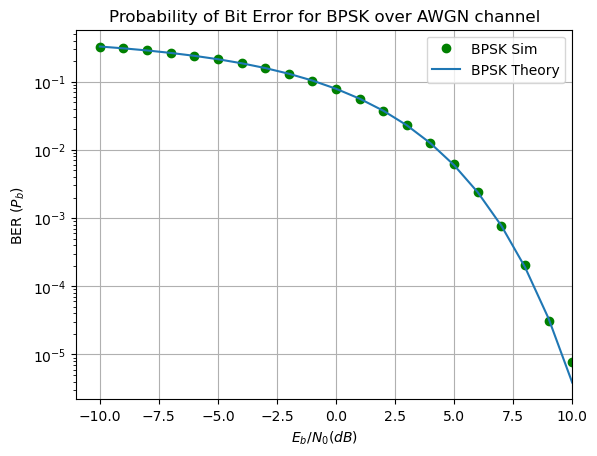

In [50]:

#Calculating the BER theoritically 

snr_db=np.arange(-10,11,1)
BER_theory = 0.5*erfc(np.sqrt(10**(snr_db/10)))

#Plot the BER vs SNR Curve
fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(snr_db,BER_sim,color='g',marker='o',linestyle='',label='BPSK Sim')
ax.semilogy(snr_db,BER_theory,marker='',linestyle='-',label='BPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for BPSK over AWGN channel')
ax.legend()
ax.set_xlim(-11,10)
ax.grid(True)
plt.show()

   


# RESULT
### (a)Reconstruct a transmitted image, modulated by BPSK scheme, at the receiver.  
### (b)Modelled a channel for transmission AWGN noise,added with transmitted signal.
### (c)Plotted the bit error rate (BER) vs SNR (in dB) curve for different values of SNR and compared with the theoretical value 

# RESULT ANALYSIS
### (a)The probability of incorrect bit detection (BER) is practically lost for a large SNR and is of the order of 1/N (1 bit in the sequence).All BER curves follow the theoretical BER curve with small deviations.

### (b)The minimum SNR for which BPSK has 1 bit error depends on the total transmitted bits, so that for a larger number of transmitted bits, the SNR must be higher for the signal to be correctly reconstructed.

